In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [5]:
# load dataset
dta = pd.read_csv("main_df_Aug1.csv")

(array([   16.,   306.,   824.,  4104.,  5721.,  9157.,  5599.,  2125.,
          701.,    87.]),
 array([ 1.4 ,  1.76,  2.12,  2.48,  2.84,  3.2 ,  3.56,  3.92,  4.28,
         4.64,  5.  ]),
 <a list of 10 Patch objects>)

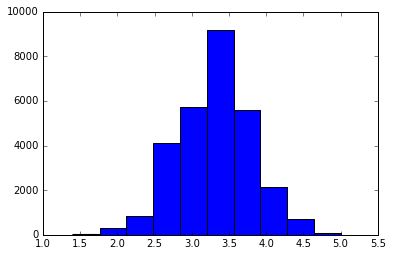

In [9]:
plt.hist(list(dta['overallRating']))

In [20]:
dta.columns

Index(['Unnamed: 0', 'name', 'industry', 'sectorName', 'overallRating',
       'compensationAndBenefitsRating', 'careerOpportunitiesRating',
       'recommendToFriendRating', 'cultureAndValuesRating',
       'workLifeBalanceRating', 'seniorLeadershipRating', 'numberOfRatings',
       'id', 'industryName', 'industryId', 'ceo', 'ceoname', 'ceonumratings',
       'ceopctapprove', 'ceopctdisapprove', 'ceotitle', 'goodCompany'],
      dtype='object')

In [15]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['goodCompany'] = (dta.overallRating >= 3.8).astype(int)

In [24]:
dta['numberOfRatings'].describe()

count    28640.000000
mean       698.802060
std       1559.971563
min         48.000000
25%        165.000000
50%        307.000000
75%        638.000000
max      22911.000000
Name: numberOfRatings, dtype: float64

# Data Visualization 

In [25]:
# show plots in the notebook
%matplotlib inline

# Classification Models

In [28]:
dta.columns

Index(['Unnamed: 0', 'name', 'industry', 'sectorName', 'overallRating',
       'compensationAndBenefitsRating', 'careerOpportunitiesRating',
       'recommendToFriendRating', 'cultureAndValuesRating',
       'workLifeBalanceRating', 'seniorLeadershipRating', 'numberOfRatings',
       'id', 'industryName', 'industryId', 'ceo', 'ceoname', 'ceonumratings',
       'ceopctapprove', 'ceopctdisapprove', 'ceotitle', 'goodCompany'],
      dtype='object')

In [33]:
X = dta[['numberOfRatings','compensationAndBenefitsRating','careerOpportunitiesRating', \
        'recommendToFriendRating','cultureAndValuesRating','workLifeBalanceRating','seniorLeadershipRating', \
        'ceonumratings','ceopctapprove']]

y = dta['goodCompany']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
## Here are some possible models to use, but feel free to import whichever ones you like

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [36]:
## Here are the precision-recall curve and log-likelihood computation functions

import numpy as np
import matplotlib.pyplot as plt


def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    return (recallvec, precisionvec, threshvec)

def log_lik_binary(truthvec, probvec):
    return np.sum((np.log(probvec)*truthvec) + (np.log(1-probvec)*(1-truthvec)))

In [37]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict_proba(X_test)



In [39]:
log_lik_binary(y_test,pred_vals_lr[:,1])

-2177.7905322362194

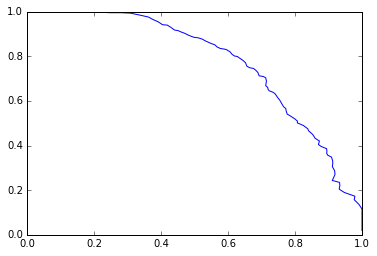

In [40]:
pr_curve(y_test,pred_vals_lr[:,1]);

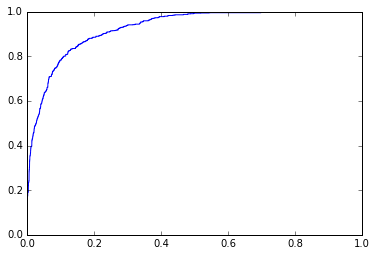

In [41]:
fpr, tpr, thresholds = roc_curve(y_test,pred_vals_lr[:,1])
plt.plot(fpr, tpr)

In [42]:
roc_auc_score(y_test,pred_vals_lr[:,1])

0.92751639134915398